In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# Download historical data for S&P 500 index
sp500 = yf.download('^GSPC', start='2010-01-01', end='2023-06-28')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Check if there are any NaN values in the Close prices
print(f"NaN values in 'Close' prices: {sp500['Close'].isna().sum()}")

NaN values in 'Close' prices: 0


In [4]:
# Calculate the daily returns
sp500['return'] = sp500['Close'].pct_change()

In [5]:
# Drop NaN values
sp500 = sp500.dropna()

In [6]:
# Create a DataFrame for storing values
df = sp500.assign(
    month = sp500.index.month,
    day = sp500.index.day,
    positive = sp500['return'] > 0,
)

In [7]:
# Define month number (1 = January, 2 = February, ..., 12 = December)
month_number = 7

# Define a mapping from month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Get the month name from the dictionary
month_name = month_names[month_number]

# Filter only for the desired month
df = df[df['month'] == month_number]

In [8]:
df = df.iloc[1:].dropna(subset=['return'])

# Create weekday groups
day_groups = df.groupby('day')

# List of days that exist in the dataset, sorted
existing_days = sorted(df['day'].unique())

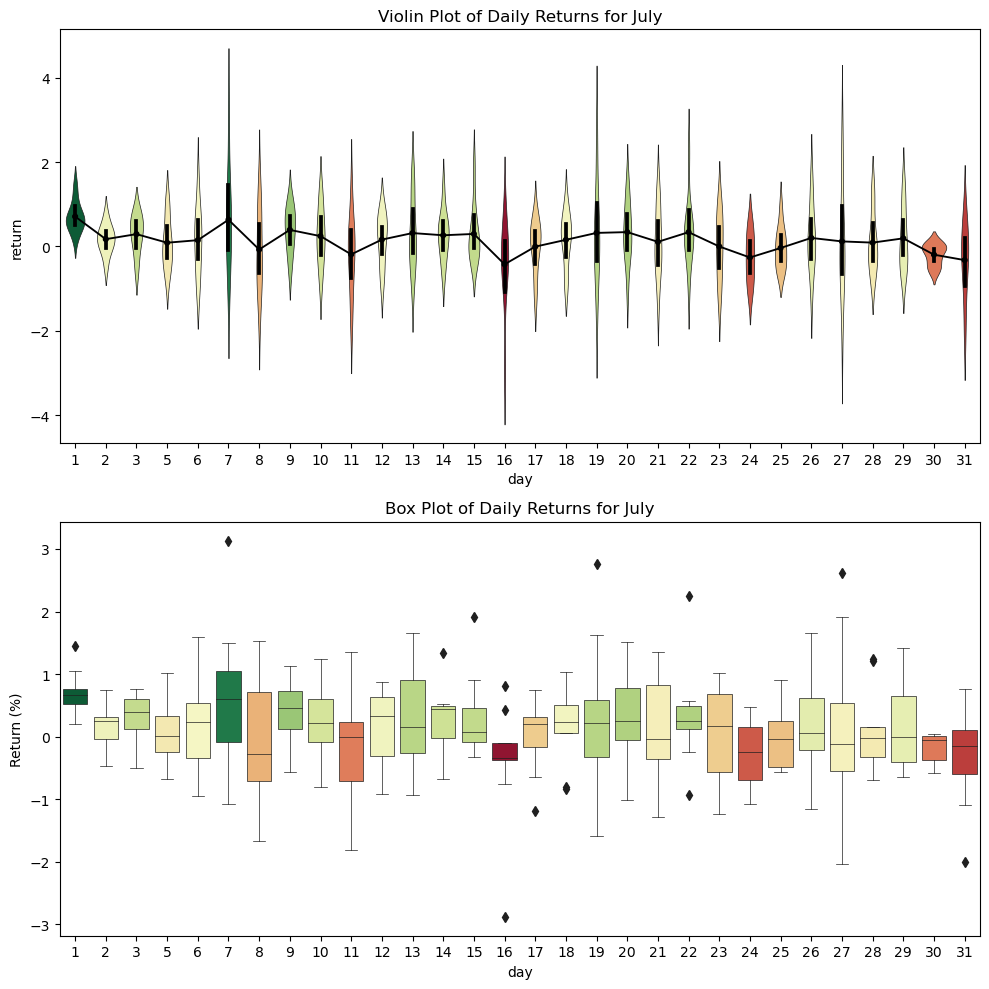

In [9]:
# Determine the colors for the violin plot and box plot based on mean return
mean_return = day_groups['return'].mean()
norm = plt.Normalize(mean_return.min(), mean_return.max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# Create the first figure for violin and box plots
fig1, axs1 = plt.subplots(2, 1, figsize=(10, 10))

# Plot the violin plot for daily seasonality
sns.violinplot(x=df['day'], y=df['return']*100, ax=axs1[0], inner=None, palette=sm.to_rgba(mean_return.values), linewidth=0.5)
axs1[0].set_title(f'Violin Plot of Daily Returns for {month_name}')
axs1[0].set_ylabel('Return (%)')

# Add a line for the mean
sns.pointplot(x=df['day'], y=df['return']*100, ax=axs1[0], color='black', estimator=np.mean, linestyles='-', scale=0.5)

# Create a boxplot
sns.boxplot(x=df['day'], y=df['return']*100, ax=axs1[1], palette=sm.to_rgba(mean_return.values), linewidth=0.5)
axs1[1].set_title(f'Box Plot of Daily Returns for {month_name}')
axs1[1].set_ylabel('Return (%)')

plt.tight_layout()
plt.show()


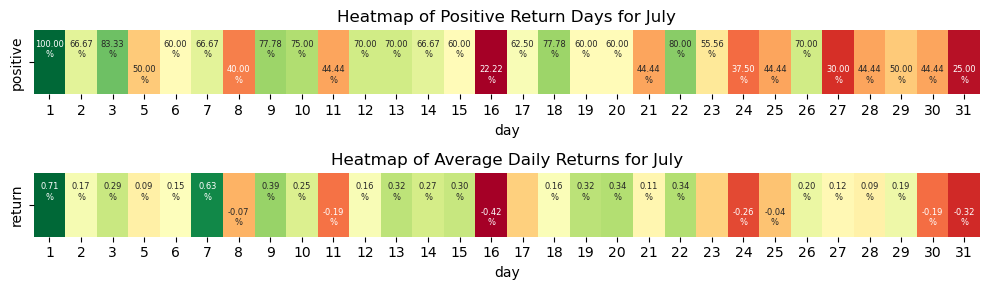

In [10]:
# Create the figure for heatmaps
fig, axs = plt.subplots(2, 1, figsize=(10, 3))

# Create a heatmap showing the percentage of positive days
positive_days = pd.DataFrame(day_groups['positive'].mean() * 100).T
positive_days = positive_days.reindex(columns=existing_days, fill_value=0)
sns.heatmap(positive_days, cmap='RdYlGn', ax=axs[0], annot=True, fmt=".2f", cbar=False, annot_kws={'size': 6})
axs[0].set_title(f'Heatmap of Positive Return Days for {month_name}')

# Adjust the position of annotations based on their value and remove zero values
for text in axs[0].texts:
    text_val = float(text.get_text())
    if text_val > 50:
        text.set_position((text.get_position()[0], text.get_position()[1] - 0.2))
    elif text_val == 0:
        text.set_text('')
    else:
        text.set_position((text.get_position()[0], text.get_position()[1] + 0.2))
    if text_val != 0:
        text.set_text(f'{text.get_text()}\n%')

# Create a heatmap showing the average daily returns
average_returns = pd.DataFrame(day_groups['return'].mean() * 100).T
average_returns = average_returns.reindex(columns=existing_days, fill_value=0)
sns.heatmap(average_returns, cmap='RdYlGn', ax=axs[1], annot=True, fmt=".2f", cbar=False, annot_kws={'size': 6})
axs[1].set_title(f'Heatmap of Average Daily Returns for {month_name}')

# Adjust the position of annotations based on their value and remove zero values
for text in axs[1].texts:
    text_val = float(text.get_text())
    if text_val > 0:
        text.set_position((text.get_position()[0], text.get_position()[1] - 0.2))
    elif text_val == 0:
        text.set_text('')
    else:
        text.set_position((text.get_position()[0], text.get_position()[1] + 0.2))
    if text_val != 0:
        text.set_text(f'{text.get_text()}\n%')

plt.tight_layout()
plt.show()